In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
loan_dataset= pd.read_csv('../data set/dataset2/Loan Default Prediction Dataset_exported.csv')

# Data Exploration and Cleaning

## Exploration

In [ ]:
loan_dataset

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,ZZZX015LV2,65.0,114515.0,95500.0,820.0,45.0,4.0,8.87,48.0,0.13,High School,Single,No,No,Business,No,0.0
1,ZZZV1HB132,69.0,143661.0,157929.0,407.0,38.0,4.0,6.07,60.0,0.33,Master's,Divorced,Yes,Yes,Home,No,0.0
2,ZZZMFPZFKE,27.0,102495.0,140375.0,764.0,82.0,4.0,23.82,24.0,0.63,High School,Divorced,Yes,No,Other,No,0.0
3,ZZZI5YOV9G,32.0,101616.0,101862.0,628.0,32.0,2.0,17.45,12.0,0.38,High School,Single,Yes,No,Education,No,1.0
4,ZZZHT6VWO4,37.0,25394.0,235125.0,527.0,12.0,2.0,12.45,24.0,0.17,Bachelor's,Married,Yes,Yes,Education,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34948,V3YHEC0XYV,63.0,19413.0,61698.0,413.0,30.0,4.0,21.04,36.0,0.75,PhD,Divorced,Yes,No,Auto,Yes,0.0
34949,V3Y2DVUJWY,61.0,149374.0,211488.0,575.0,0.0,2.0,11.39,12.0,0.83,PhD,Divorced,No,No,Home,Yes,0.0
34950,V3XVN61QIC,18.0,120526.0,239200.0,818.0,17.0,4.0,22.66,60.0,0.67,PhD,Married,No,No,Auto,Yes,0.0
34951,V3XUC9YB3C,45.0,56537.0,55520.0,802.0,66.0,4.0,13.28,48.0,0.27,Master's,Married,No,Yes,Other,Yes,0.0


In [ ]:
loan_dataset.shape

(34953, 17)

In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34953 entries, 0 to 34952
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          34953 non-null  object 
 1   Age             34952 non-null  float64
 2   Income          34952 non-null  float64
 3   LoanAmount      34952 non-null  float64
 4   CreditScore     34952 non-null  float64
 5   MonthsEmployed  34952 non-null  float64
 6   NumCreditLines  34952 non-null  float64
 7   InterestRate    34952 non-null  float64
 8   LoanTerm        34952 non-null  float64
 9   DTIRatio        34952 non-null  float64
 10  Education       34952 non-null  object 
 11  MaritalStatus   34952 non-null  object 
 12  HasMortgage     34952 non-null  object 
 13  HasDependents   34952 non-null  object 
 14  LoanPurpose     34952 non-null  object 
 15  HasCoSigner     34952 non-null  object 
 16  Default         34952 non-null  float64
dtypes: float64(10), object(7)
memor

In [ ]:
loan_dataset.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000
mean,43.596790,82517.463321,127932.257267,573.998369,59.539912,2.512446,13.392942,35.972877,0.500395,0.114929
std,15.048213,38924.334926,70677.772128,159.007881,34.602297,1.115649,6.635468,16.997104,0.231047,0.318941
min,18.000000,15005.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48994.750000,66783.750000,437.000000,30.000000,2.000000,7.680000,24.000000,0.300000,0.000000
50%,43.000000,82627.000000,128274.000000,572.000000,60.000000,3.000000,13.300000,36.000000,0.500000,0.000000
75%,57.000000,116244.500000,188973.250000,712.000000,89.000000,4.000000,19.140000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249997.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## Cleaning

### Missing Values



In [ ]:
loan_dataset.isnull().sum()

LoanID            0
Age               1
Income            1
LoanAmount        1
CreditScore       1
MonthsEmployed    1
NumCreditLines    1
InterestRate      1
LoanTerm          1
DTIRatio          1
Education         0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           1
dtype: int64

In [ ]:
columns_to_fill = ['Education','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner','Default']

for column in columns_to_fill:
    mode_value = loan_dataset[column].mode().iloc[0]
    loan_dataset[column].fillna(mode_value, inplace=True)

In [ ]:
columns_to_fill = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']

for column in columns_to_fill:
    mean_value = loan_dataset[column].mean()
    loan_dataset[column].fillna(mean_value, inplace=True)

### Outliers

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'MonthsEmployed'}>,
        <Axes: title={'center': 'NumCreditLines'}>],
       [<Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'LoanTerm'}>,
        <Axes: title={'center': 'DTIRatio'}>],
       [<Axes: title={'center': 'Default'}>, <Axes: >, <Axes: >]],
      dtype=object)

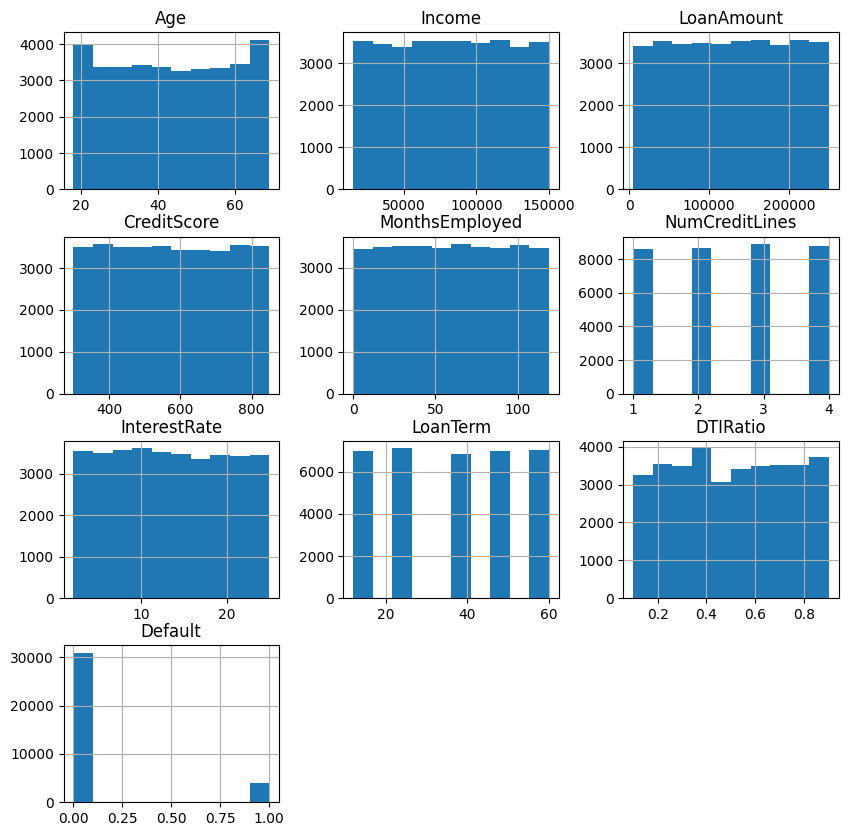

In [ ]:
# Boxplots for numerical features
loan_dataset.hist(figsize=(10, 10))


In [ ]:
# # Bar charts for categorical features
# for col in loan_dataset.select_dtypes(include="object"):
#     loan_dataset[col].value_counts().plot(kind="bar")


In [ ]:
# Isolate potential outliers
outlier_detector = IsolationForest(contamination=0.1)
outlier_labels = outlier_detector.fit_predict(loan_dataset.select_dtypes(exclude="object"))

# Create a new column with outlier flags
loan_dataset["outlier"] = outlier_labels


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
for col in loan_dataset.select_dtypes(include="object"):
#     print(loan_dataset[col].value_counts(dropna=False))
    print(loan_dataset[col][loan_dataset["outlier"] == 1].value_counts(dropna=False))


ZZZX015LV2    1
WQCS32GG05    1
WQCTYAUGX4    1
WQD0C1WRSB    1
WQD152L94I    1
             ..
YDMMPKSQ16    1
YDMNV10MPH    1
YDMYM61ODU    1
YDN3B1P3BT    1
V3XMCMHOZY    1
Name: LoanID, Length: 31457, dtype: int64
PhD            7919
High School    7917
Bachelor's     7870
Master's       7751
Name: Education, dtype: int64
Married     10687
Single      10437
Divorced    10333
Name: MaritalStatus, dtype: int64
Yes    15805
No     15652
Name: HasMortgage, dtype: int64
Yes    15990
No     15467
Name: HasDependents, dtype: int64
Other        6372
Home         6361
Auto         6270
Education    6236
Business     6218
Name: LoanPurpose, dtype: int64
Yes    15928
No     15529
Name: HasCoSigner, dtype: int64


In [ ]:
# filtered_data = loan_dataset[loan_dataset["outlier"] == 0].copy()


In [ ]:
# filtered_data

# Feature Engineering

## Label Encoding

In [ ]:
label_encoder = LabelEncoder()
columns_to_encode = ['Education','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']  # Add the column names you want to encode
for column in columns_to_encode:
    loan_dataset[column + '_encoded'] = label_encoder.fit_transform(loan_dataset[column])

# loan_dataset['property_area_encoded'] =label_encoder.fit_transform(loan_dataset['Property_Area'])
# # gender_encoded = label_encoder.fit_transform(loan_dataset.Gender)



In [ ]:
loan_dataset.replace({'Dependents':{'3+':3}},inplace=True)

# MODEL TRAINING


## Preparing

In [ ]:
X = loan_dataset.drop(['LoanID','Education','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner','Default'],axis=1)
Y = loan_dataset['Default']

In [ ]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,outlier,Education_encoded,MaritalStatus_encoded,HasMortgage_encoded,HasDependents_encoded,LoanPurpose_encoded,HasCoSigner_encoded
0,65.00000,114515.000000,95500.000000,820.000000,45.000000,4.000000,8.870000,48.000000,0.130000,1,1,2,0,0,1,0
1,69.00000,143661.000000,157929.000000,407.000000,38.000000,4.000000,6.070000,60.000000,0.330000,1,2,0,1,1,3,0
2,27.00000,102495.000000,140375.000000,764.000000,82.000000,4.000000,23.820000,24.000000,0.630000,1,1,0,1,0,4,0
3,32.00000,101616.000000,101862.000000,628.000000,32.000000,2.000000,17.450000,12.000000,0.380000,1,1,2,1,0,2,0
4,37.00000,25394.000000,235125.000000,527.000000,12.000000,2.000000,12.450000,24.000000,0.170000,-1,0,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34948,63.00000,19413.000000,61698.000000,413.000000,30.000000,4.000000,21.040000,36.000000,0.750000,1,3,0,1,0,0,1
34949,61.00000,149374.000000,211488.000000,575.000000,0.000000,2.000000,11.390000,12.000000,0.830000,1,3,0,0,0,3,1
34950,18.00000,120526.000000,239200.000000,818.000000,17.000000,4.000000,22.660000,60.000000,0.670000,-1,3,1,0,0,0,1
34951,45.00000,56537.000000,55520.000000,802.000000,66.000000,4.000000,13.280000,48.000000,0.270000,1,2,1,0,1,4,1


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size = 0.25, random_state = 42)


## Scaling numerical features

In [ ]:
# Feature scaling
scaler = StandardScaler()
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','LoanTerm','DTIRatio']
X[numerical_features] = scaler.fit_transform(X[numerical_features])



In [ ]:
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy is:", accuracy * 100)

    # Precision
#     precision = precision_score(y_test, y_pred, average='binary')  # Assuming binary classification
    precision = precision_score(y_test, y_pred, average='binary')

    print("Precision is:", precision * 100)

    # Recall
    recall = recall_score(y_test, y_pred,  average='binary')  # Assuming binary classification
    print("Recall is:", recall * 100)

    # F1-score
    f1 = f1_score(y_test, y_pred,  average='binary')  # Assuming binary classification
    print("F1-score is:", f1 * 100)

#     # Cross-validation
#     score = cross_val_score(model, X, y, cv=5)
#     print("Cross-validation score is:", np.mean(score) * 100)


In [ ]:
def classify_and_update_results(model, X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Convert X_train and X_test to NumPy arrays
    X_train = np.array(X_train)
    X_test = np.array(X_test)

    # Convert y_train and y_test to NumPy arrays
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Update results dataframe
    results.loc[len(results)] = [model_name, accuracy, precision, recall, f1]

## Training

In [ ]:
model_lr= LogisticRegression(solver='liblinear')
classify(model_lr, X, Y)


Accuracy is: 95.7203341343403
Precision is: 88.7601390498262
Recall is: 73.44199424736337
F1-score is: 80.37775445960126


In [ ]:
model_dt = DecisionTreeClassifier()
classify(model_dt, X, Y)

Accuracy is: 92.81382309188695
Precision is: 69.52022577610536
Recall is: 70.85330776605944
F1-score is: 70.18043684710352


In [ ]:
model_rf = RandomForestClassifier()
classify(model_rf, X, Y)


Accuracy is: 96.00640805584163
Precision is: 91.90821256038647
Recall is: 72.96260786193672
F1-score is: 81.34687332977018


In [ ]:
model_svm = SVC(kernel='linear', C=1.0)
classify(model_svm, X, Y)

Accuracy is: 95.60590456573979
Precision is: 87.57126567844927
Recall is: 73.63374880153404
F1-score is: 80.0


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
classify(model_knn, X, Y)

Accuracy is: 94.96509898157683
Precision is: 86.02150537634408
Recall is: 69.03163950143816
F1-score is: 76.59574468085107


In [ ]:
model_nb = GaussianNB()
classify(model_nb, X, Y)

Accuracy is: 95.60590456573979
Precision is: 87.57126567844927
Recall is: 73.63374880153404
F1-score is: 80.0


In [ ]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear', C=1.0),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB()
}


In [ ]:
# # Results Section
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])


In [ ]:
for model_name, model in models.items():
    classify_and_update_results(model, X, Y, model_name)


# Results

In [ ]:
def plot_metrics(results_df, metrics_list, metric_names_list):
    results_df.columns = results_df.columns.str.lower()  # Convert column names to lowercase
    num_models = len(results_df['model'])

    # Define colors for each metric
    colors = ['blue', 'green', 'orange', 'red']

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=len(metrics_list), ncols=1, figsize=(10, 6 * len(metrics_list)))

    for i, (metric, metric_name, color) in enumerate(zip(metrics_list, metric_names_list, colors)):
        axes[i].bar(results_df['model'], results_df[metric], label=metric_name, color=color)
        axes[i].set_title(f'Comparison of {metric_name}')
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(metric_name)
        axes[i].legend()

    plt.tight_layout()
    plt.show()



In [ ]:
# Define metrics and metric names
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']


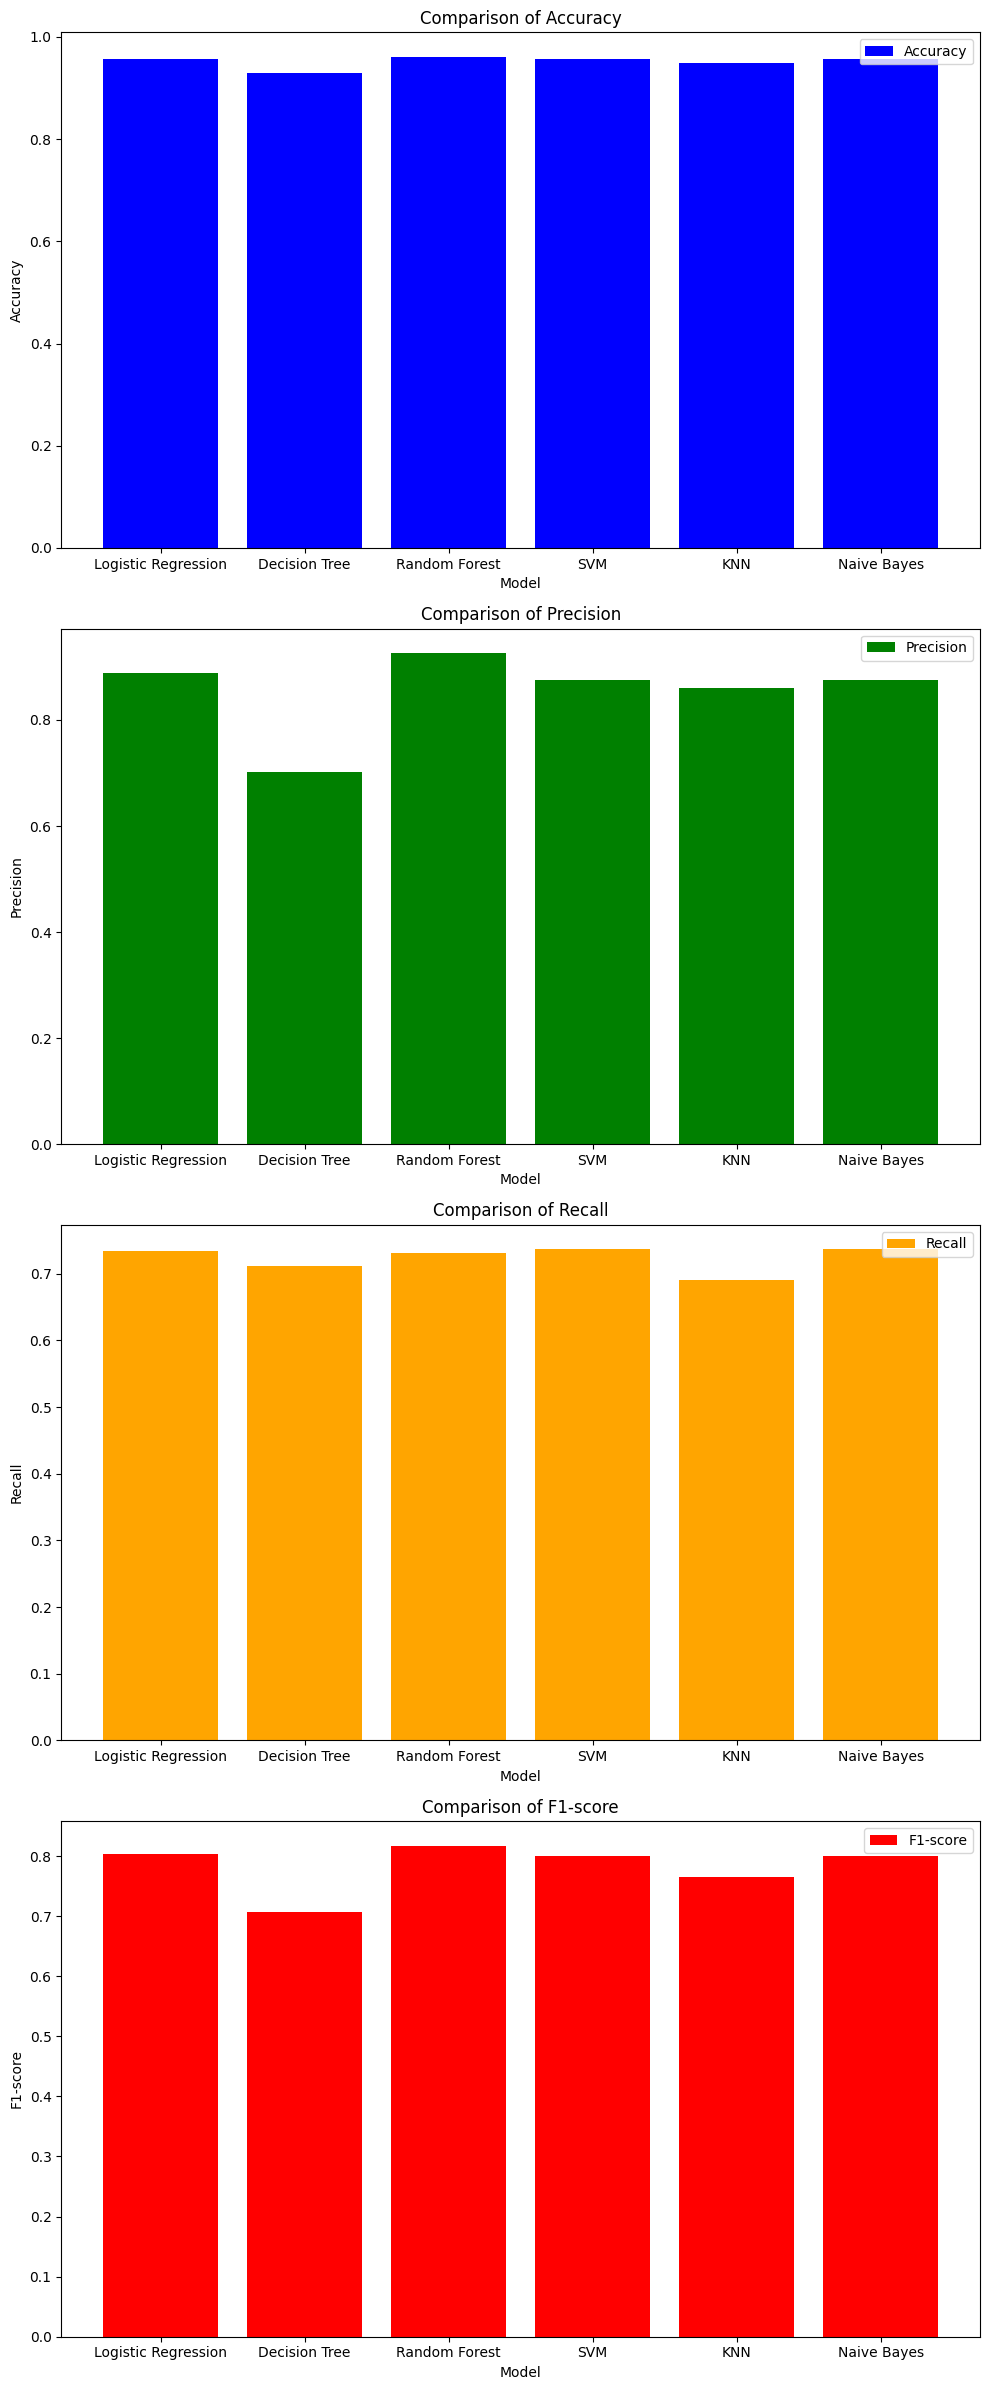

In [ ]:
# # Plot the comparison
plot_metrics(results, metrics, metric_names)
